In [2]:
import json
METRICS = ['train_hard_loss', 'train_soft_loss', 'train_acc','test_loss', 'test_acc']
def get_metrics(path):
    with open(path, 'r') as f:
        data = json.load(f)
    return tuple(data[metric] for metric in METRICS)

def populate_dict(path):
    return dict(zip(METRICS, get_metrics(path)))

In [3]:
import numpy as np
BETAS = np.arange(0, 1200, 200)
RUNS = 3

things = {}
for beta in BETAS:
    things[f'{beta:03d}'] = {}
    for run in range(RUNS):
        path = f"tucker-tweaking-experiments/l1/featuremap/BETAx{beta:03d}/{run}/metrics.json"
        things[f'{beta:03d}'][run] = populate_dict(path)


In [4]:
def stack_arrays(d, metric):
    arrays = [np.array(d[run][metric]) for run in range(RUNS)]
    stacked = np.stack(arrays)
    return np.mean(stacked, axis=0), np.std(stacked, axis=0, ddof=1)

thing_p = {}
for beta in BETAS:
    thing_p[f'{beta:03d}'] = {}
    for metric in METRICS:
        mean, std = stack_arrays(things[f'{beta:03d}'], metric)
        thing_p[f'{beta:03d}'][metric] = {'mean': mean, 'std': std}
    


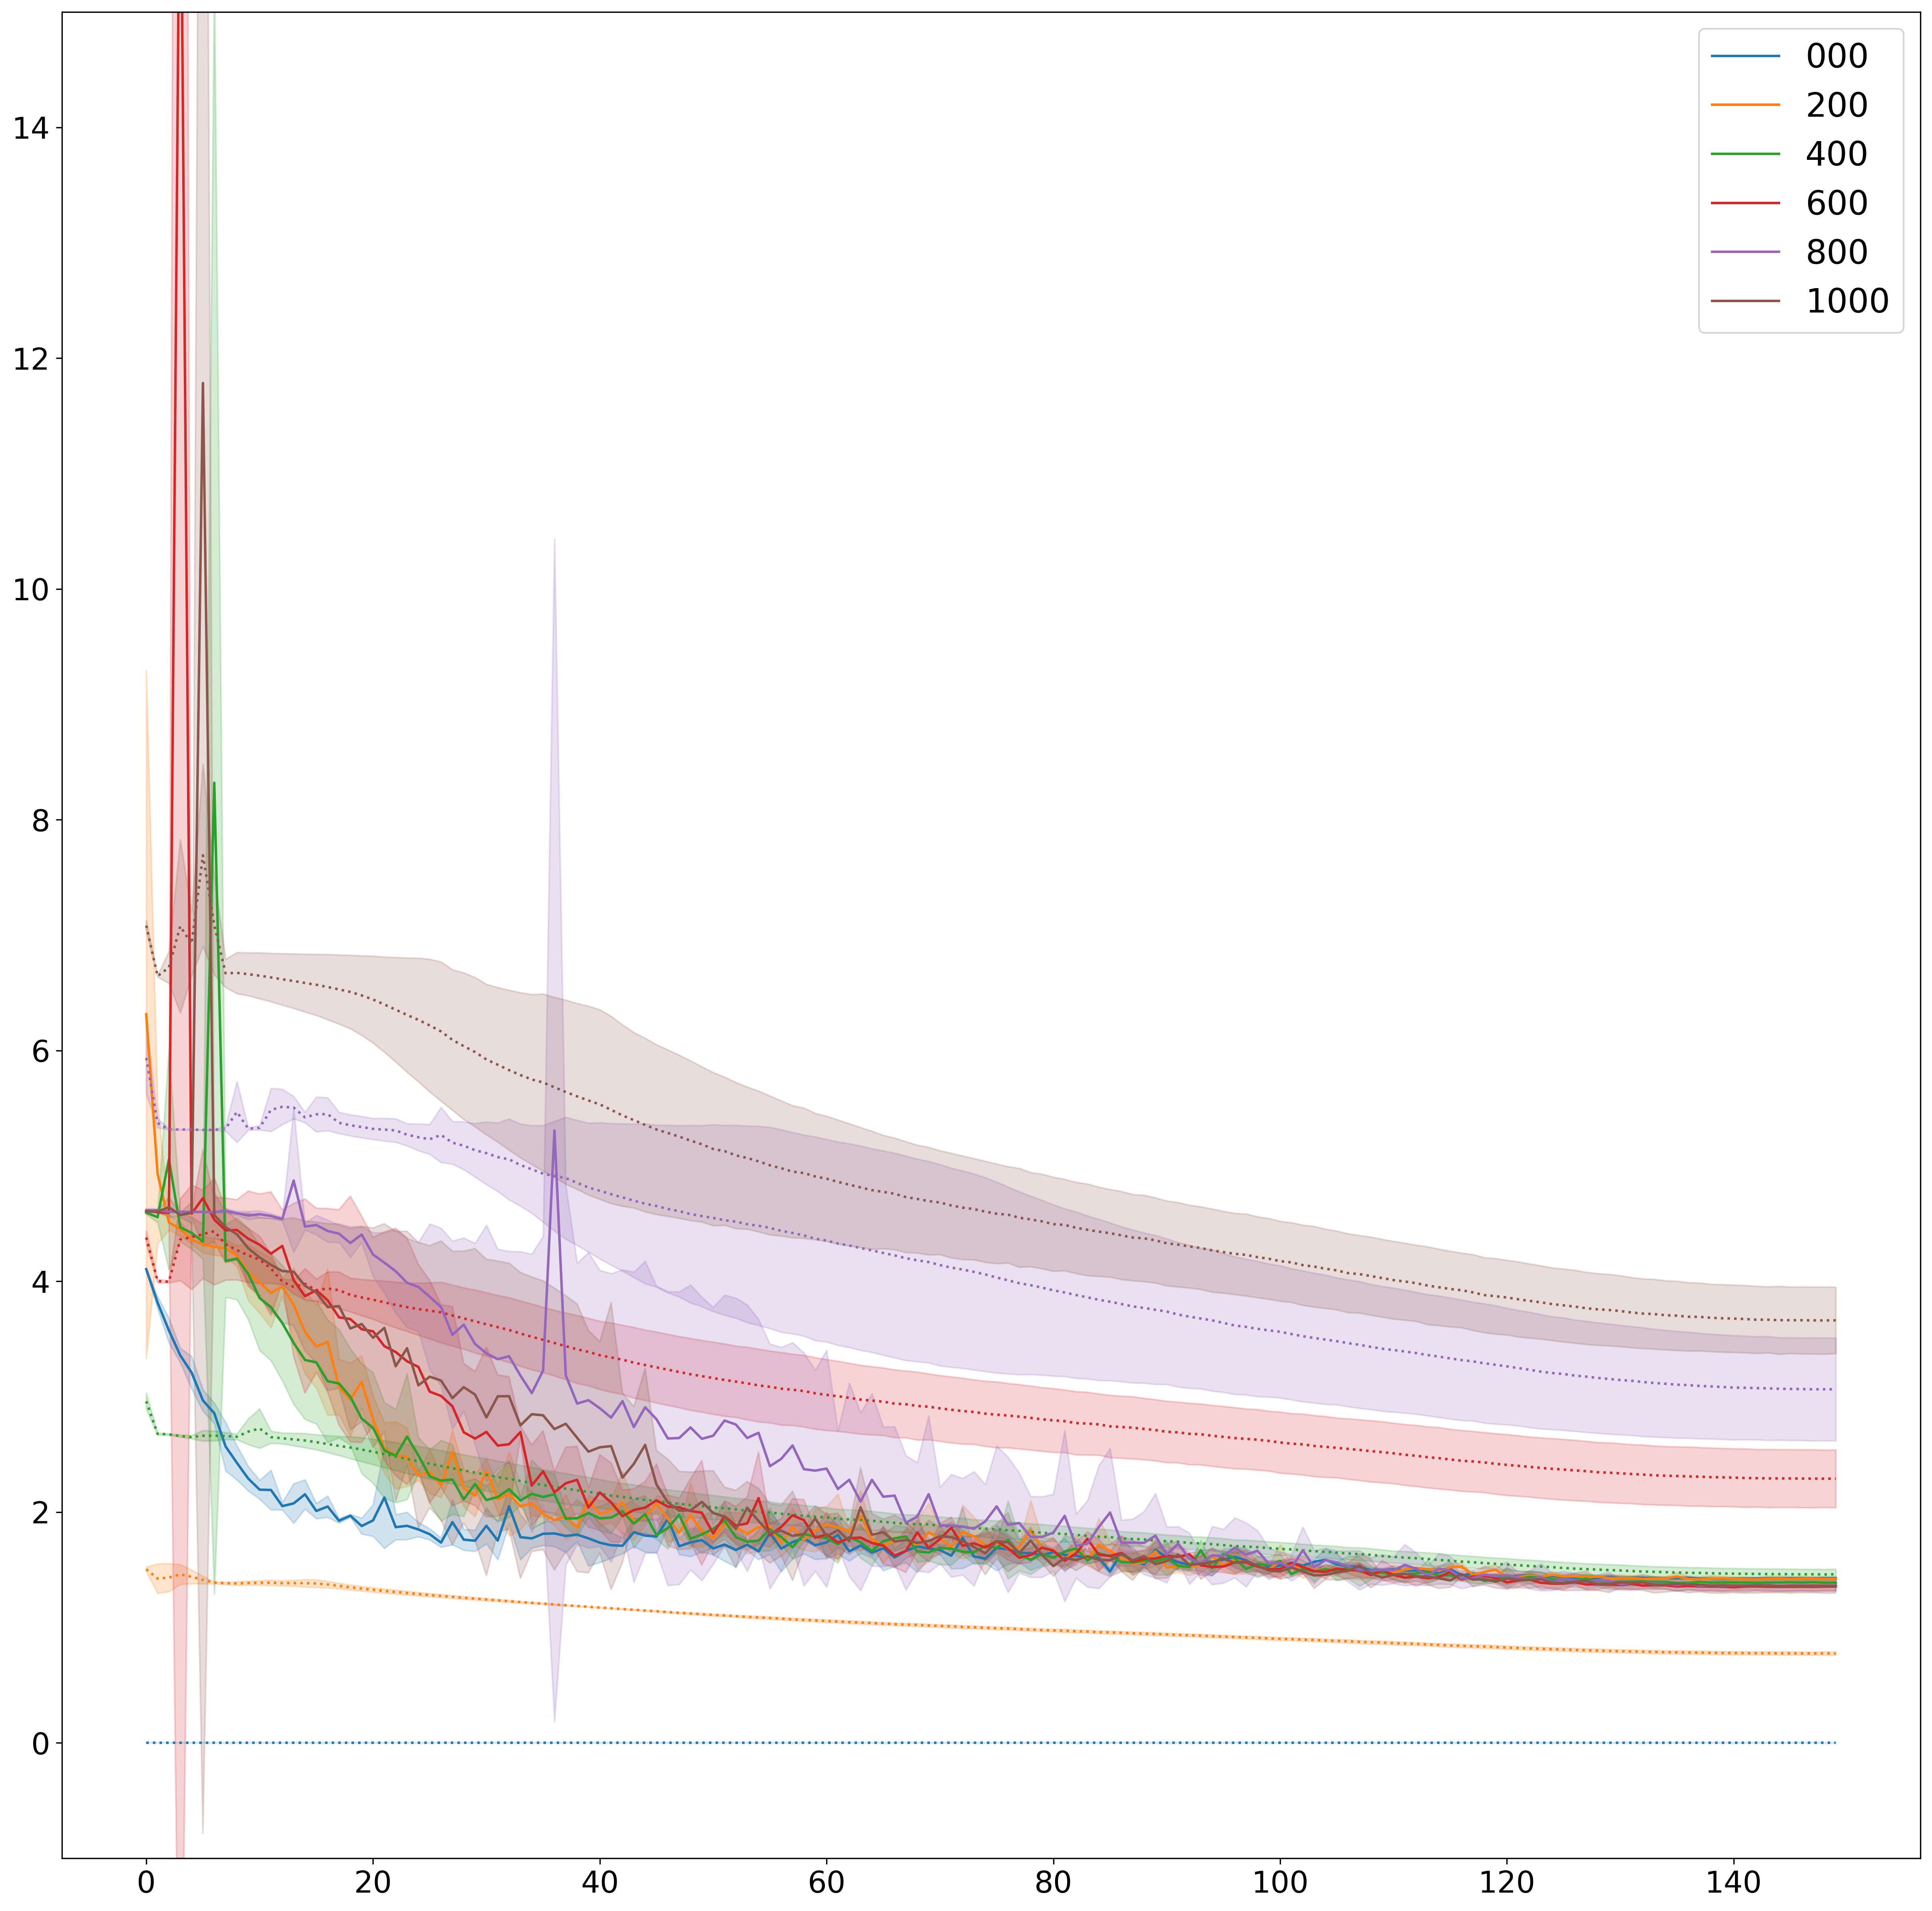

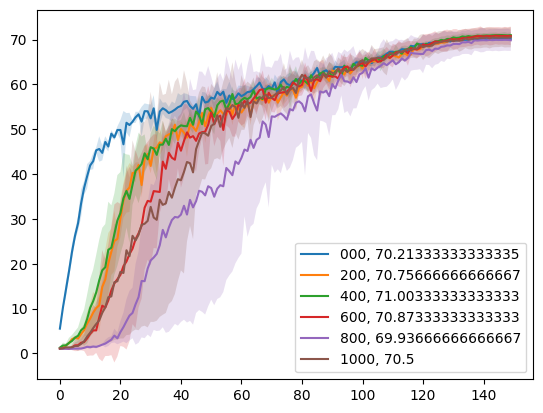

In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from itertools import cycle

x = np.arange(150)

plt.rcParams.update({
    'font.size': 20,
    'axes.titlesize': 26,
    'axes.labelsize': 24,
    'xtick.labelsize': 18,
    'ytick.labelsize': 18,
    'legend.fontsize': 20,
    'figure.titlesize': 26
})
plt.subplots(figsize=(20, 20), dpi=300)

local_color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])
for beta in BETAS:
    color = next(local_color_cycle)
    soft_loss = thing_p[f"{beta:03d}"]["train_soft_loss"]

    plt.plot(x, soft_loss['mean'], color=color,linestyle='dotted')
    plt.fill_between(x,
                    soft_loss['mean'] - soft_loss['std'],
                    soft_loss['mean'] + soft_loss['std'],
                    alpha=0.2, color=color)

    # hard_loss = thing_p[f"{beta:03d}"]["train_hard_loss"]
    # plt.plot(x, hard_loss['mean'], color=color, linestyle='dashed')
    # plt.fill_between(x,
    #                 hard_loss['mean'] - hard_loss['std'],
    #                 hard_loss['mean'] + hard_loss['std'],
    #                 alpha=0.2, color=color)

    test_loss = thing_p[f"{beta:03d}"]["test_loss"]
    plt.plot(x, test_loss['mean'], label=f'{beta:03d}', color=color, linestyle='solid')
    plt.fill_between(x,
                    test_loss['mean'] - test_loss['std'],
                    test_loss['mean'] + test_loss['std'],
                    alpha=0.2, color=color)
plt.ylim(-1,15)
plt.legend()
plt.show()

mpl.rcParams.update(mpl.rcParamsDefault)
plt.subplots()

local_color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])
for beta in BETAS:
    color = next(local_color_cycle)
    data = thing_p[f"{beta:03d}"]["test_acc"]
    plt.plot(x, data['mean'], label=f'{beta:03d}, {data['mean'].max()}')
    plt.fill_between(x,
                    data['mean'] - data['std'],
                    data['mean'] + data['std'],
                    alpha=0.2)
plt.legend()
plt.show()

